## By: Naresh Shewkani








## GRIP: The Sparks Foundation




## Data Science and Business Analytics Internship




# Task 2: Prediction using Unsupervised ML

Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [2]:
iris_data = pd.read_csv("E:\Firefox Downloads\Iris.csv")

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Dropping column that is not required

In [4]:
iris_data.drop("Id", axis=1, inplace=True)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_data.shape, iris_data.size

((150, 5), 750)

In [6]:
pd.crosstab(iris_data['Species'], "count")

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


So there are 50 samples of each of the three species

Check for null values

In [7]:
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Distribution of data using Histogram

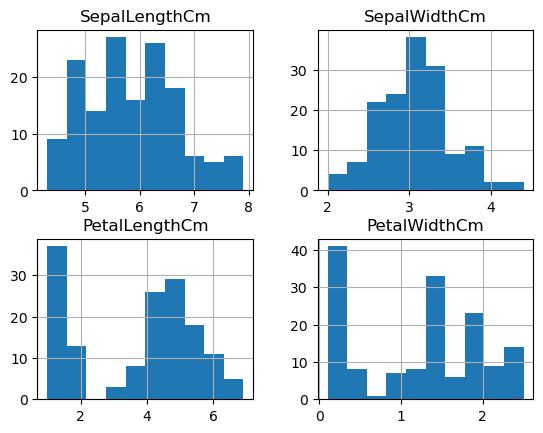

In [8]:
iris_data.hist();

Converting target column values to numeric type

In [9]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
print(f'Replacing values ',iris_data['Species'].unique(), ' with [0, 1, 2]');
iris_data.replace(to_replace=iris_data['Species'].unique(), value=[0, 1, 2], inplace=True)
iris_data

Replacing values  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']  with [0, 1, 2]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


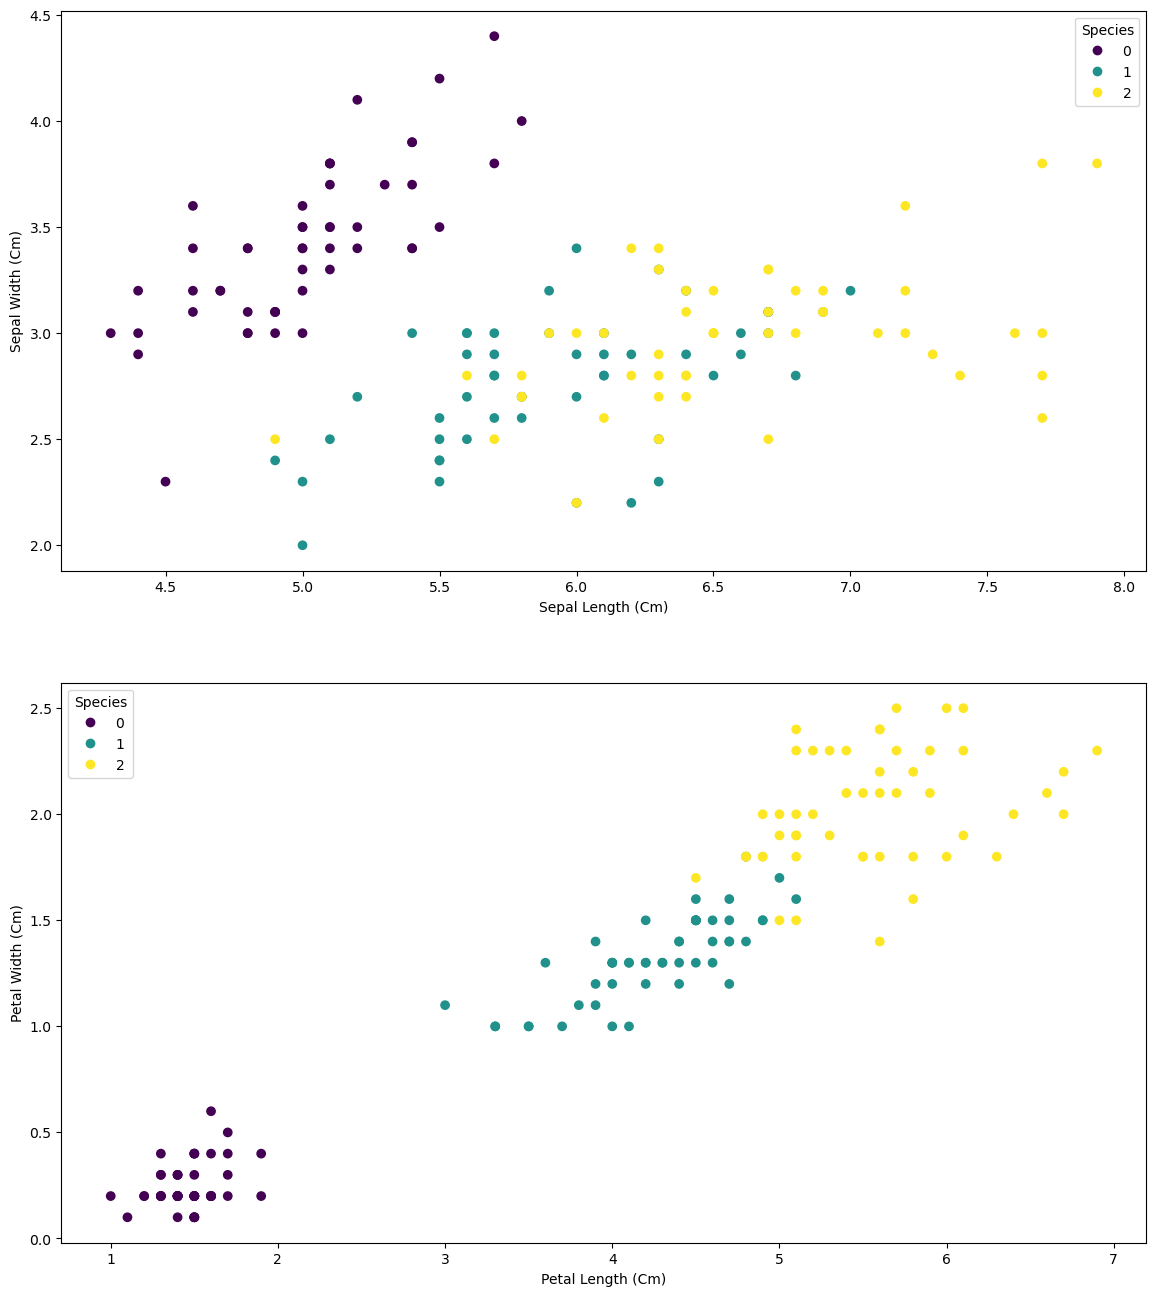

In [11]:
# create the axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# plotting the data
scatter1 = ax[0].scatter(x=iris_data.SepalLengthCm, y=iris_data.SepalWidthCm, c=iris_data.Species);

scatter2 = ax[1].scatter(x=iris_data.PetalLengthCm, y=iris_data.PetalWidthCm, c=iris_data.Species);


# customizing the plots
ax[0].set(xlabel="Sepal Length (Cm)", ylabel="Sepal Width (Cm)");

ax[1].set(xlabel="Petal Length (Cm)", ylabel="Petal Width (Cm)");

# add legend
ax[0].legend(*scatter1.legend_elements(), title="Species")

ax[1].legend(*scatter2.legend_elements(), title="Species");



As we can see that from the given data, 3 groups can be easily seprated

### Correlation Matrix

In [12]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### Representing Correlation Matrix in HeatMap

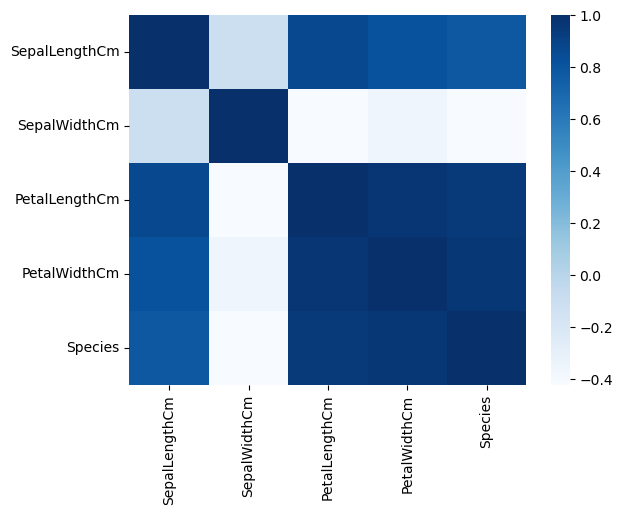

In [13]:
sns.heatmap(iris_data.corr(), cmap="Blues");

Above graph indicates a lot of columns in this dataset are highly associated with each other

This may also indicate that if we drop some columns that are highly correlated and keep only some of them, we might still be able to train our model

### Scatter Plot

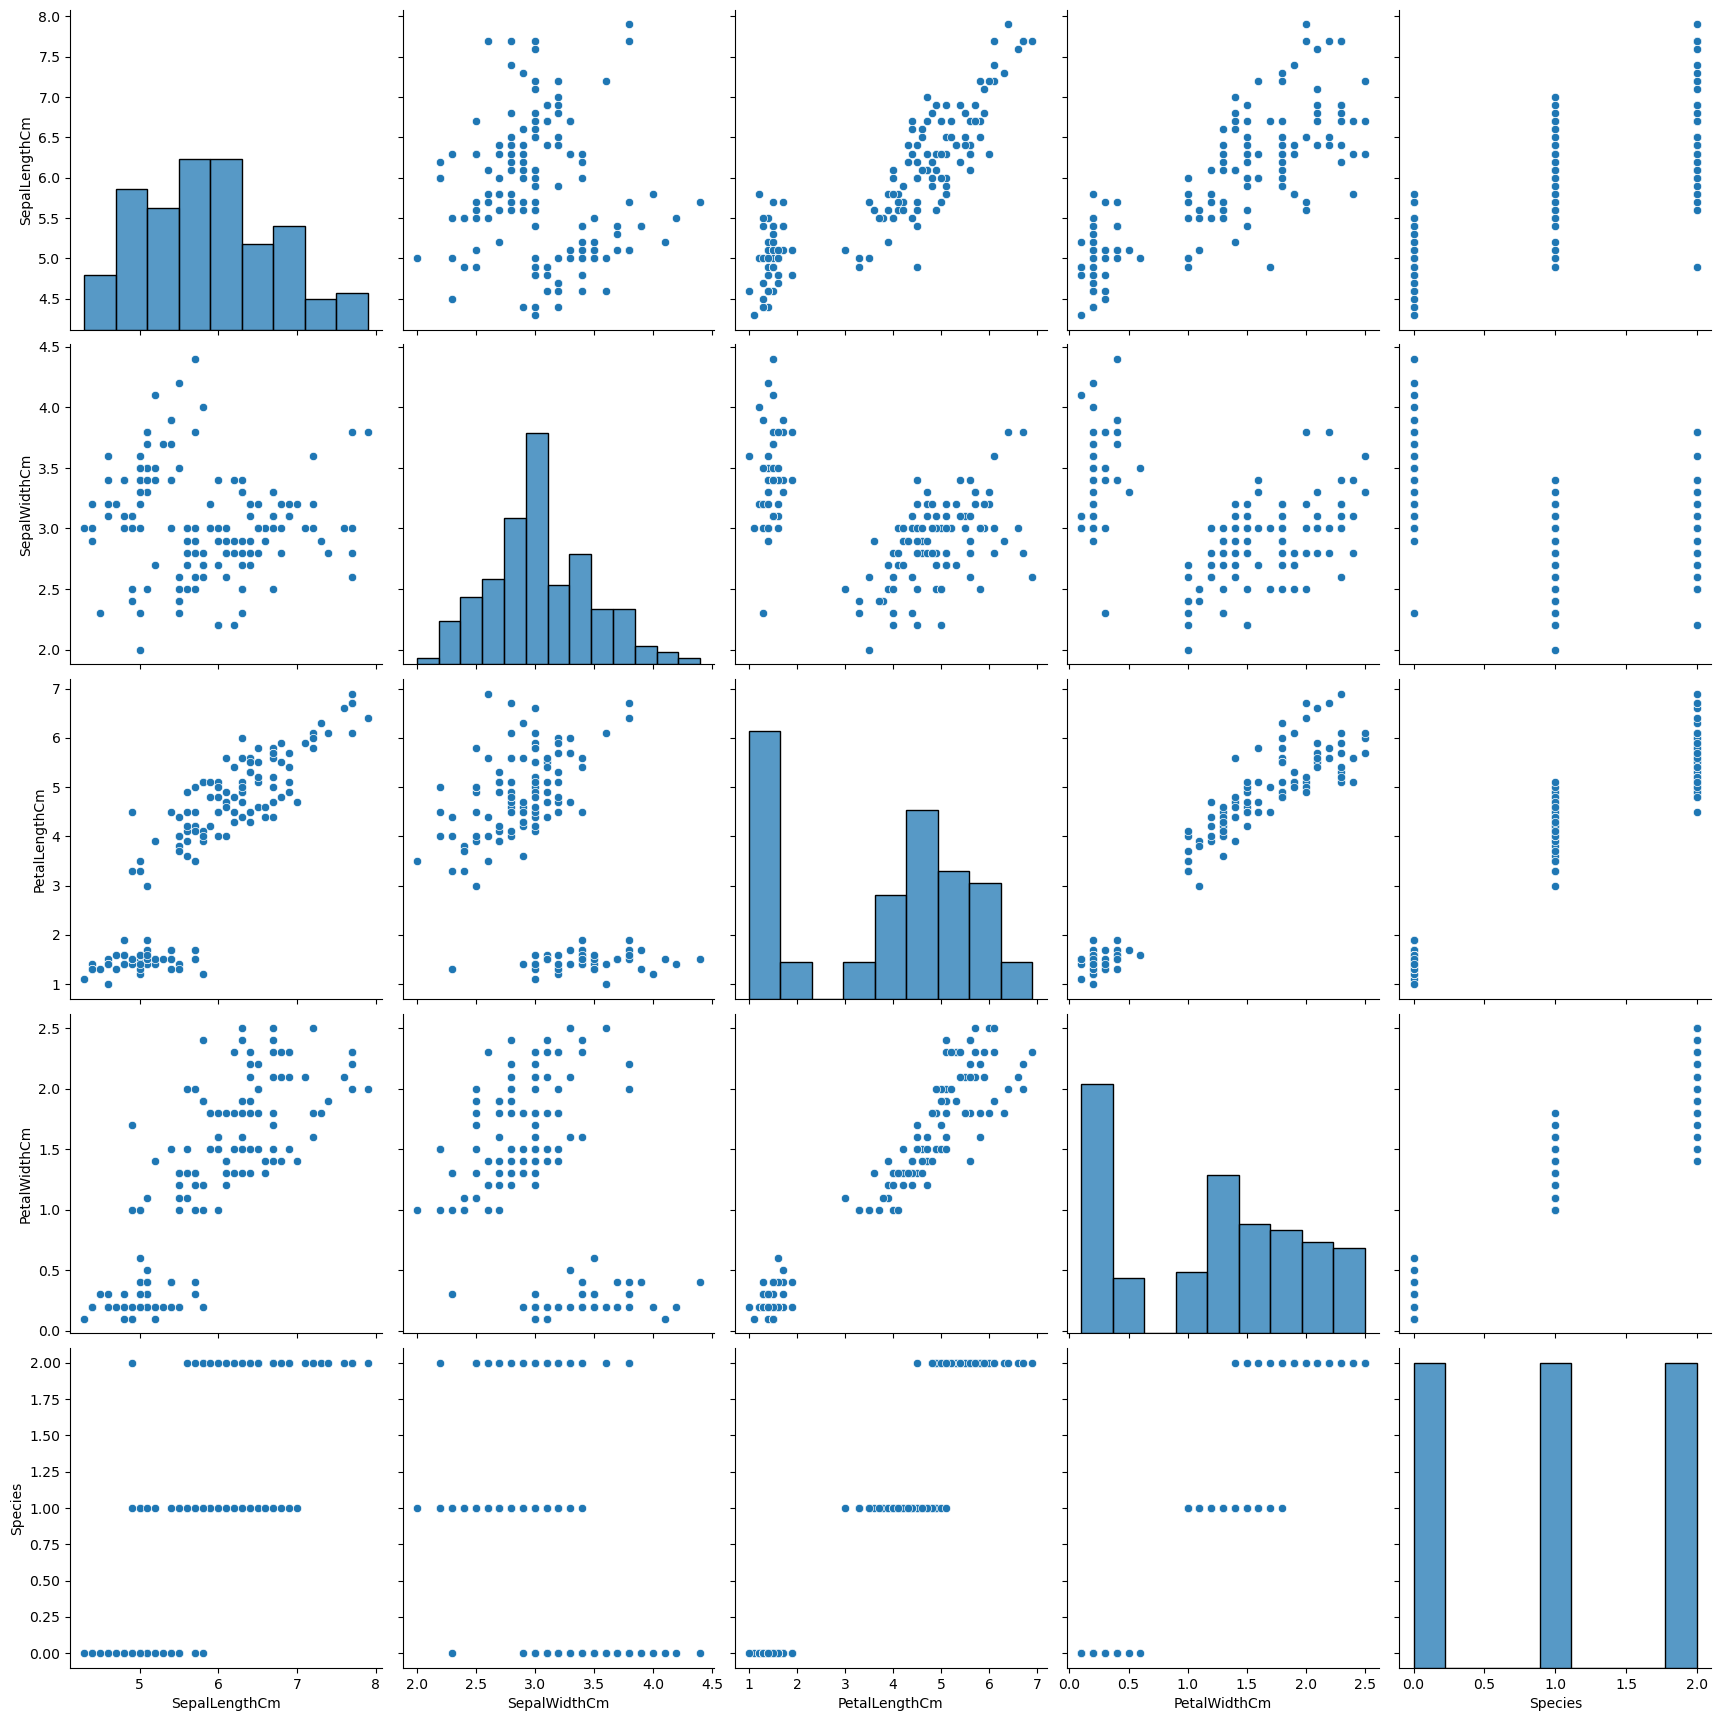

In [14]:
sns.pairplot(iris_data, height=3.5);

In [15]:
import warnings
warnings.filterwarnings('ignore')

Finding Optimum no. of clusters


In [16]:
from sklearn.cluster import KMeans

within_cluster_sum_of_square=[]

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris_data.drop("Species", axis=1))
    within_cluster_sum_of_square.append(kmeans.inertia_)



### The Elbow Method

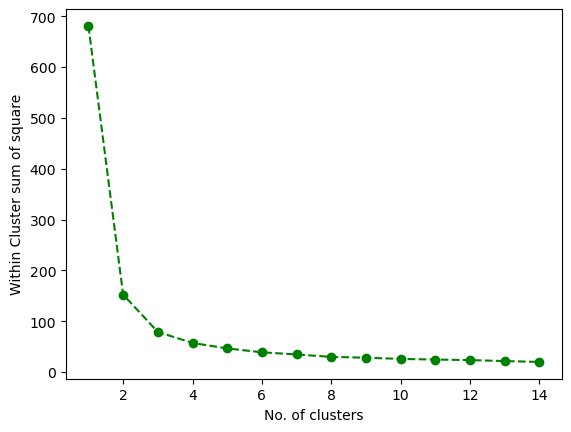

In [17]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, 15),within_cluster_sum_of_square, 'go--');

ax.set(xlabel="No. of clusters", ylabel="Within Cluster sum of square");

The idea behind the elbow method is to identify the value of number of clusters where the distortion (within cluster sum of square) begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of no. of clusters

From the above graph we can infer that the optimum no. of clusters is 3

In [18]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(iris_data.drop("Species", axis=1));



Visualizing the predicted clusters

In [19]:
y_kmeans == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

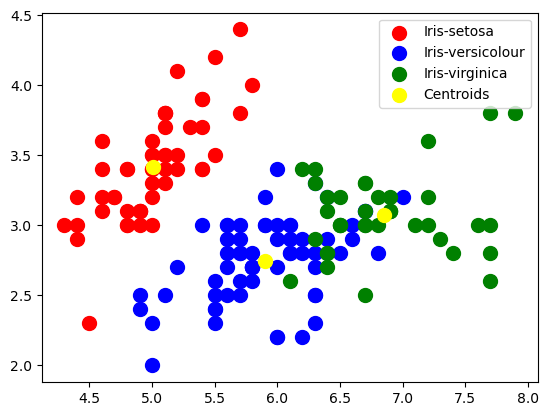

In [20]:
# Visualising the clusters - On the first two columns

x = iris_data.drop("Species", axis=1).values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

Visualizing Clusters from original data

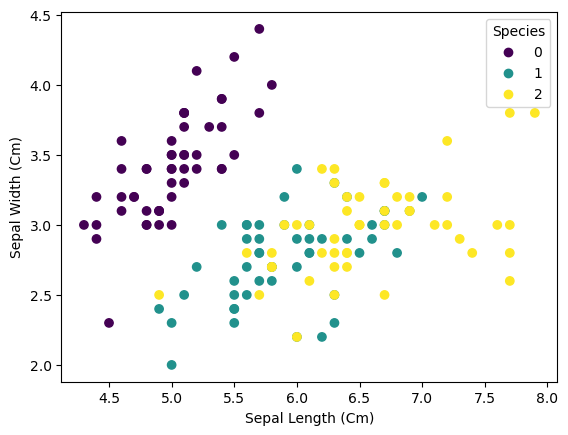

In [21]:
# create the axes
fig, ax = plt.subplots()

# plotting the data
scatter1 = ax.scatter(x=iris_data.SepalLengthCm, y=iris_data.SepalWidthCm, c=iris_data.Species);

# customizing the plots
ax.set(xlabel="Sepal Length (Cm)", ylabel="Sepal Width (Cm)");

# add legend
ax.legend(*scatter1.legend_elements(), title="Species");


We can see both are pretty similar!!